In [47]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Import libraries for data manipulation

In [6]:
charging_station_gdf = gpd.read_file('./datasets/others/charging-station.geojson')
parking_spot_gdf = gpd.read_file('./datasets/others/parking-spot.geojson')
zipcode_area_gdf = gpd.read_file('./datasets/others/eindhoven-zipcode.geojson')

Load the datasets

In [24]:
zipcode_area_gdf = zipcode_area_gdf.to_crs(3857)
zipcode_area_gdf['area'] = zipcode_area_gdf.area / 10**6

In [62]:
charging_station_gdf = charging_station_gdf.to_crs(3857)

In [82]:
parking_spot_gdf = parking_spot_gdf.to_crs(3857)

Update the CRS to follow Cartesian system (EPSG:3857, unit=m)

Save the calculated area per postcode in km2

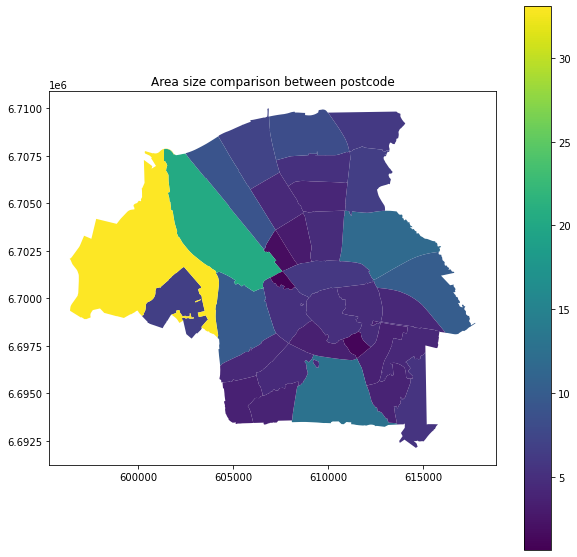

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))

zipcode_area_gdf.plot("area", legend=True, ax=ax)

plt.title("Area size comparison between postcode")
plt.show()

Size comparison between each postcode

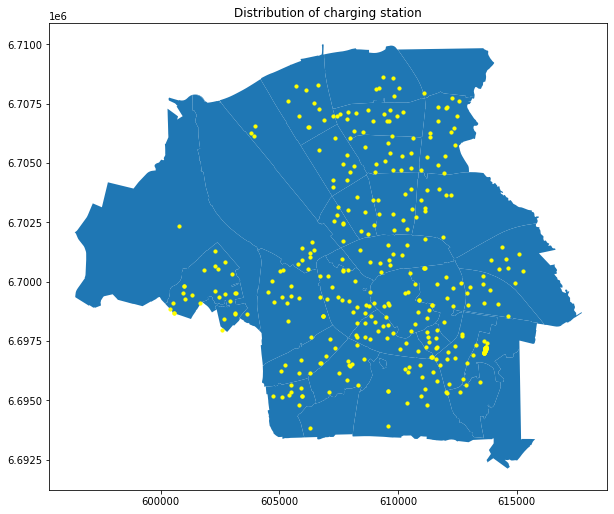

In [74]:
fig, ax = plt.subplots(figsize=(10, 10))
zipcode_area_gdf.plot(ax=ax)
charging_station_gdf.plot(markersize=10, ax=ax, color='yellow')

plt.title("Distribution of charging station")
plt.show()

Distribution of charging station in each postcode

<AxesSubplot:>

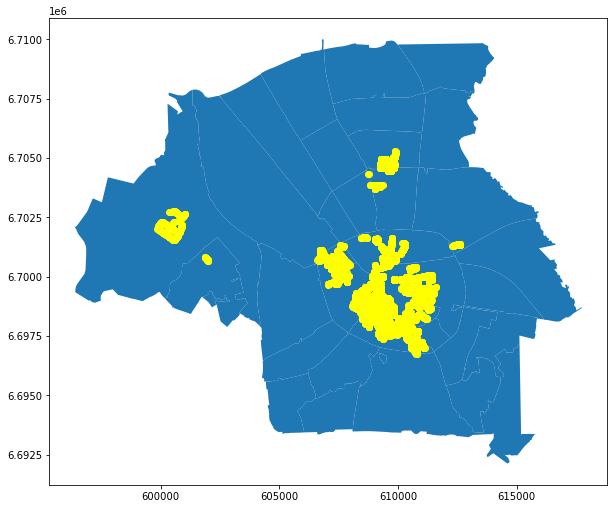

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))

zipcode_area_gdf.plot(ax=ax)
parking_spot_gdf.plot(ax=ax, color='yellow')

Distribution of charging station in each postcode

In [85]:
pointsInPolygon = gpd.sjoin(charging_station_gdf, zipcode_area_gdf, how="inner", predicate='intersects')

In [102]:
charging_station_per_area_df = pointsInPolygon.groupby('pc4_code').size().to_frame()
charging_station_per_area_df = charging_station_per_area_df.rename(columns={0: "total"})